# Reconnaissance d'image

**Importation des modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Mounting drive**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !wget --no-check-certifacate \
# https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
# -O /tmp/cats_and_dogs_filtered.zip

**Unzapping nos datasets**

In [4]:
import os
import zipfile

# file_to_unzip = "/content/drive/MyDrive/Mes Codes/Hors Classe/Reconnaissance d'images/cats_and_dogs_filtered.zip"

# file_ziped = zipfile.ZipFile(file_to_unzip, "r")
# file_ziped.extractall("/content/drive/MyDrive/Mes Codes/Hors Classe/Reconnaissance d'images//Reconnaissance d'image")
# file_ziped.close()

**Préparations de nos repertoires**

In [5]:
path_data = "/content/drive/MyDrive/Mes Codes/00 - Hors Classe/Reconnaissance d'images/Reconnaissance d'image/cats_and_dogs_filtered"

train_path = os.path.join(path_data, "train")
validation_path = os.path.join(path_data, "validation")

train_cats_path = os.path.join(train_path, "cats")
train_dogs_path = os.path.join(train_path, "dogs")

validation_cats_path = os.path.join(validation_path, "cats")
validation_dogs_path = os.path.join(validation_path, "dogs")

**Récuperation des repertoires d'entrainement**

In [6]:
train_cat_file_name = os.listdir(train_cats_path)
train_dog_file_name = os.listdir(train_dogs_path)

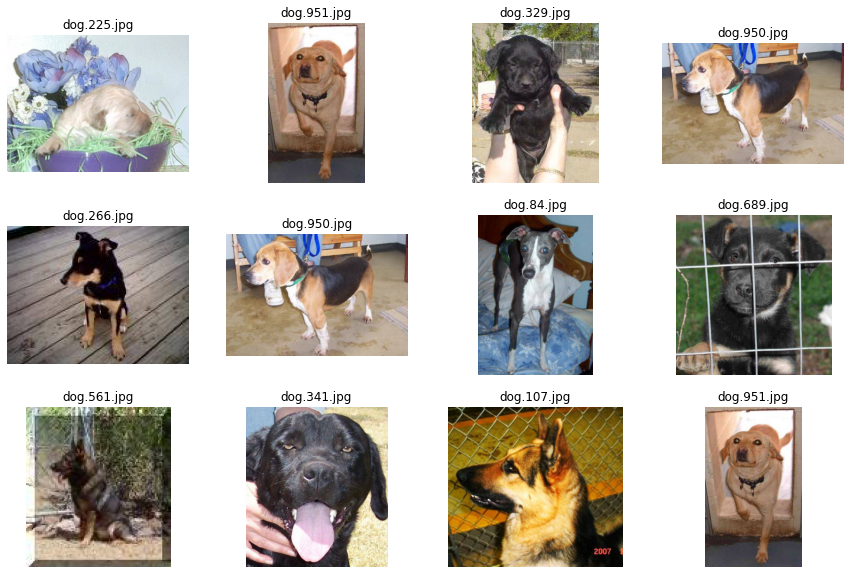

In [7]:
# Prendre 12 images de chien au hazard
echantillon_dogs = np.random.choice(train_dog_file_name, size=12)

plt.figure(figsize=(15, 10))
for i, dog in enumerate(echantillon_dogs):
  ax = plt.subplot(3, 4, i+1)
  img = mpimg.imread(os.path.join(train_dogs_path, dog))
  plt.axis("off")
  plt.imshow(img)
  ax.set_title(dog)

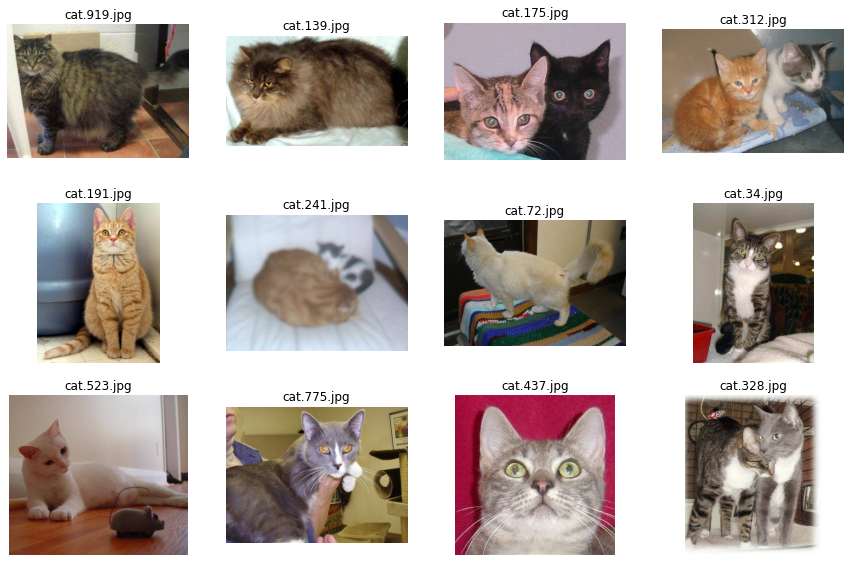

In [8]:
# Prendre 12 images de chat au hazard
echantillon_cats = np.random.choice(train_cat_file_name, size=12)

plt.figure(figsize=(15, 10))
for i, cat in enumerate(echantillon_cats):
  ax = plt.subplot(3, 4, i+1)
  img = mpimg.imread(os.path.join(train_cats_path, cat)) # Convertion de l'image jpg en rgb
  plt.axis("off")
  plt.imshow(img)
  ax.set_title(cat)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary"
)

validation_generator = train_datagen.flow_from_directory(
    validation_path,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = "relu"),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
  tf.keras.layers.MaxPooling2D((2, 2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid"),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=["acc"])

In [13]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
  raise SystemError("GPU device not found")
print(f'Found GPU at {device_name}')

Found GPU at /device:GPU:0


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=100, # 2000 images = batch_size * steps
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 50 # 1000 images = batch_size * steps
)

Epoch 1/10
100/100 [==============================] - 764s 8s/step - loss: 0.7908 - acc: 0.5180 - val_loss: 0.6893 - val_acc: 0.6060
Epoch 2/10
100/100 [==============================] - 13s 127ms/step - loss: 0.6910 - acc: 0.5820 - val_loss: 0.6156 - val_acc: 0.6640
Epoch 3/10
100/100 [==============================] - 13s 128ms/step - loss: 0.6385 - acc: 0.6585 - val_loss: 0.5807 - val_acc: 0.6790
Epoch 4/10
100/100 [==============================] - 13s 126ms/step - loss: 0.5945 - acc: 0.6960 - val_loss: 0.6279 - val_acc: 0.6460
Epoch 5/10
100/100 [==============================] - 13s 127ms/step - loss: 0.5509 - acc: 0.7265 - val_loss: 0.5713 - val_acc: 0.6950
Epoch 6/10
100/100 [==============================] - 13s 128ms/step - loss: 0.5080 - acc: 0.7550 - val_loss: 0.6005 - val_acc: 0.6810
Epoch 7/10
100/100 [==============================] - 13s 128ms/step - loss: 0.4500 - acc: 0.7955 - val_loss: 0.6087 - val_acc: 0.7050
Epoch 8/10
100/100 [==============================] - 13s

In [15]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = len(acc)

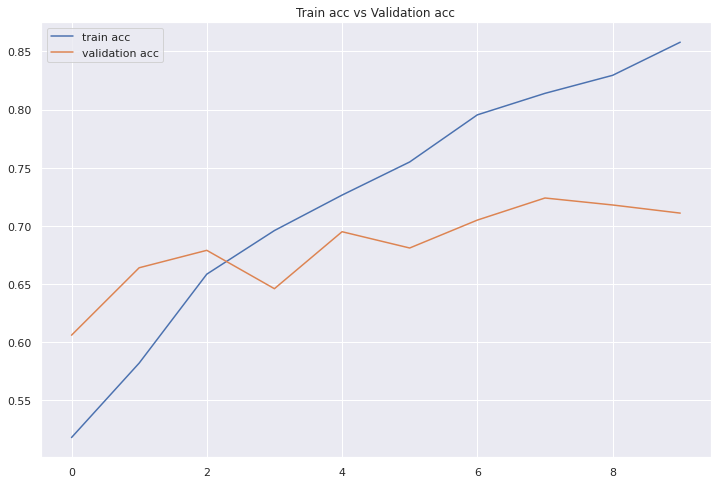

In [16]:
import seaborn as sns
sns.set()
plt.figure(figsize=(12, 8))
plt.plot(np.arange(epochs), acc, label="train acc")
plt.plot(np.arange(epochs), val_acc, label="validation acc")
plt.title('Train acc vs Validation acc')
plt.legend()

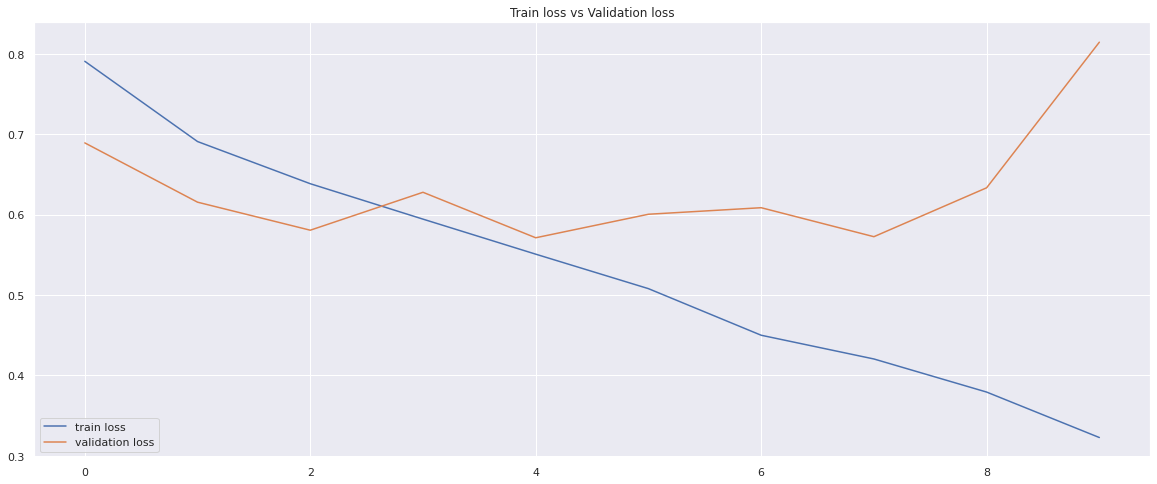

In [17]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(epochs), loss, label="train loss")
plt.plot(np.arange(epochs), val_loss, label="validation loss")
plt.title('Train loss vs Validation loss')
plt.legend()

# Image augmentation

In [18]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [19]:
from tensorflow.keras.preprocessing import image

echantillon_cats = np.random.choice(os.listdir(train_cats_path))
img = image.load_img(os.path.join(train_cats_path, echantillon_cats), target_size = (150, 150))
x = image.img_to_array(img)
x = x[np.newaxis]

datagen_img = datagen.flow(x, batch_size=1)

(-0.5, 149.5, 149.5, -0.5)

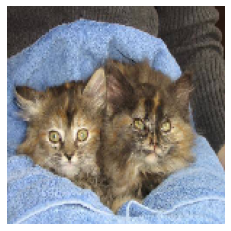

In [20]:
plt.imshow(img)
plt.axis("off")

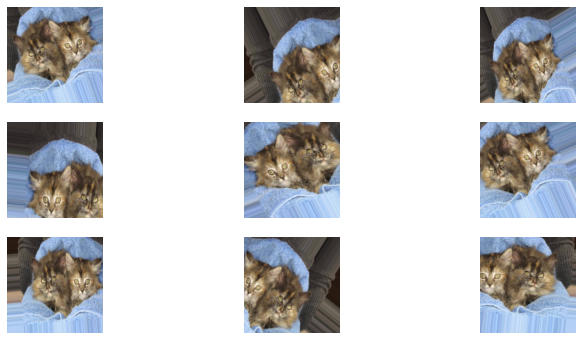

In [21]:
plt.figure(figsize=(12, 6))
for i, batch in enumerate(datagen.flow(x, batch_size = 1)):

  ax = plt.subplot(3, 3, i+1)
  plt.imshow(np.squeeze(batch).astype("int64"))
  plt.axis("off")

  if i == 8:
    break
plt.show()

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary"
)

validation_generator = train_datagen.flow_from_directory(
    validation_path,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary"
)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = "relu"),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
  tf.keras.layers.MaxPooling2D((2, 2)),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid"),
])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=["acc"])

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=100, # 2000 images = batch_size * steps
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 50 # 1000 images = batch_size * steps
)

Epoch 1/10
100/100 [==============================] - 27s 268ms/step - loss: 0.4962 - acc: 0.7755 - val_loss: 0.4911 - val_acc: 0.7710
Epoch 2/10
100/100 [==============================] - 26s 257ms/step - loss: 0.4730 - acc: 0.7830 - val_loss: 0.4708 - val_acc: 0.7850
Epoch 3/10
100/100 [==============================] - 26s 260ms/step - loss: 0.4936 - acc: 0.7805 - val_loss: 0.4880 - val_acc: 0.7750
Epoch 4/10
100/100 [==============================] - 26s 257ms/step - loss: 0.4747 - acc: 0.7815 - val_loss: 0.5400 - val_acc: 0.7270
Epoch 5/10
100/100 [==============================] - 26s 259ms/step - loss: 0.4965 - acc: 0.7735 - val_loss: 0.4835 - val_acc: 0.7730
Epoch 6/10
100/100 [==============================] - 26s 256ms/step - loss: 0.4888 - acc: 0.7680 - val_loss: 0.4737 - val_acc: 0.7850
Epoch 7/10
100/100 [==============================] - 26s 258ms/step - loss: 0.4771 - acc: 0.7815 - val_loss: 0.5061 - val_acc: 0.7580
Epoch 8/10
100/100 [==============================] - 2

In [31]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = len(acc)

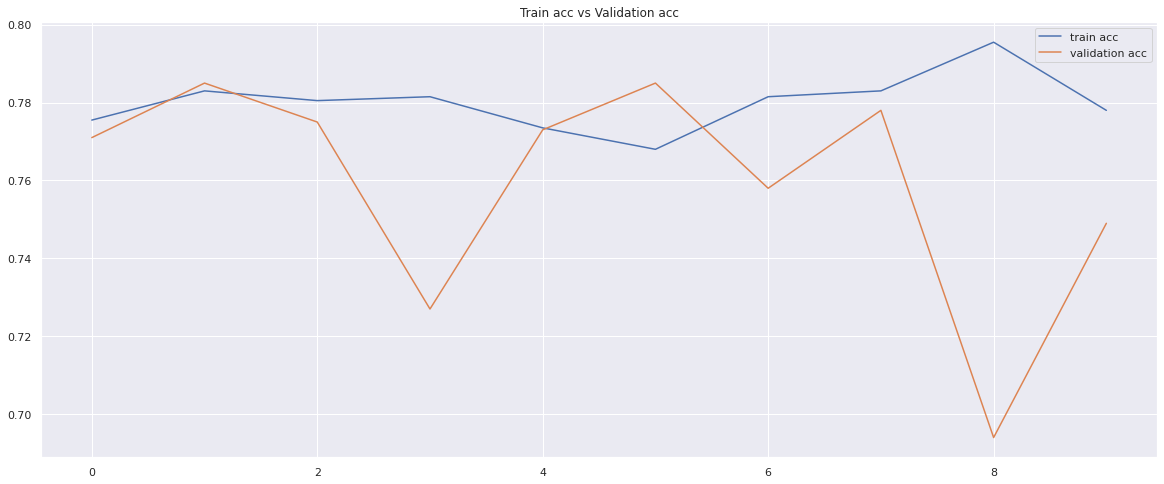

In [34]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(epochs), acc, label="train acc")
plt.plot(np.arange(epochs), val_acc, label="validation acc")
plt.title('Train acc vs Validation acc')
plt.legend()

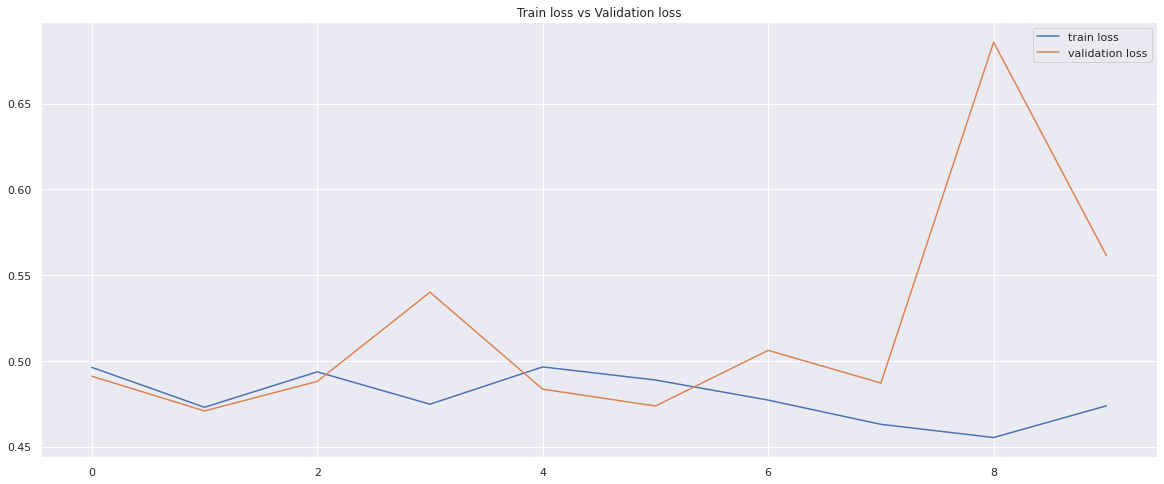

In [35]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(epochs), loss, label="train loss")
plt.plot(np.arange(epochs), val_loss, label="validation loss")
plt.title('Train loss vs Validation loss')
plt.legend()

# Prediction